In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../income_evaluation.csv')

#### To download the dataset<a href="https://drive.google.com/file/d/1Ph7CCaNaPPwm9GakCQb__LJGklNlP-t2/view?usp=sharing" title='Google Drive'> click here</a>

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

The names of the columns have a 1 space on the starting of their name so we need to take care of this

In [7]:
np.unique(df[' income'])

array([' <=50K', ' >50K'], dtype=object)

In [8]:
np.unique(df[' marital-status'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

Let's first remove the unecessary columns and that 1 space which is there 

In [9]:
df.drop(columns=' fnlwgt',inplace=True)

In [10]:
df.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')

### Rename the column names

We can see that the dataset does not have proper column names. The column names should contain underscore instead of "hyphen-minus". We should give proper names to the columns. I will do it as follows:-

In [11]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [12]:
#checking for null values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Data Preprocessing

#### Adding new columns in our dataset

In [13]:
# adding new the categorical column
bins = [16, 24, 64, 90]
labels = ["young","adult","old"]
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)
df['income_num'] = np.where(df['income'] == ' >50K', 1, 0).astype('int16')

In [14]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


### Stripping all the spaces of the columns using str.strip() function

In [15]:
np.unique(df.education)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [16]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [17]:
strip_columns = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']

In [18]:
for i in strip_columns:
    df[i] = df[i].str.strip()

In [19]:
np.unique(df.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

### Finding Categorical Values and Numerical Values

In [20]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [21]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [22]:
for var in categorical: 
    
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Now, we can see that there are several columns like workclass, occupation and native_country which contain missing values. Let's recheck it with the 'loc' operator.

In [23]:
df.loc[df['workclass']=='?']

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,1
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,1
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


There are a good amount of rows where workclass, native country and occupation column have no value maybe it was because these people were not comfortable sharing this information . We can either remove these rows or make their value equals to NaN (Not a Number). I will go for the second option because we may miss out important datapoints by deleting the rows.

In [24]:
df.loc[df['workclass']=='?', 'workclass']= np.NaN
#another approach
#df['workclass'].replace(' ?', np.NaN, inplace=True)

df.loc[df['occupation']=='?', 'occupation']= np.NaN
#another approach
#df['occupation'].replace(' ?', np.NaN, inplace=True)

df.loc[df['native_country']=='?', 'native_country']= np.NaN
#another approach
#df['native_country'].replace(' ?', np.NaN, inplace=True)

In [25]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [26]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
age_types            0
income_num           0
dtype: int64

# Data visualization

In [27]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


Income is our target variable, let's first start by visualizing it 

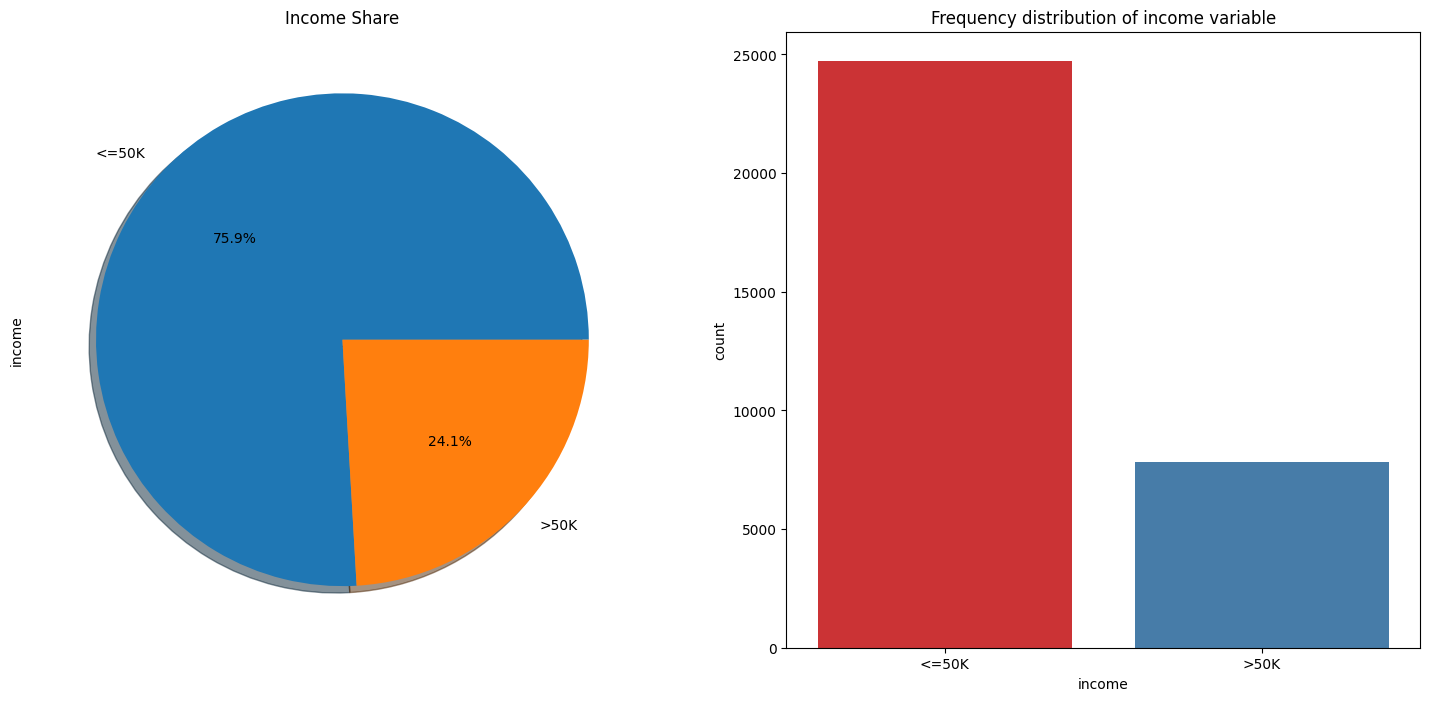

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

In [29]:
df['income'].value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [30]:
more_than_50 = df[df['income'] == '>50K']
less_than_50 = df[df['income'] == '<=50K']
print (more_than_50.shape,less_than_50.shape)

(7841, 16) (24720, 16)


Since it is highy imbalanced  the machine learning algorithm we use may get biased towards this kind of output (whichever having the higher number of outputs). We will try to balance this dataset later 

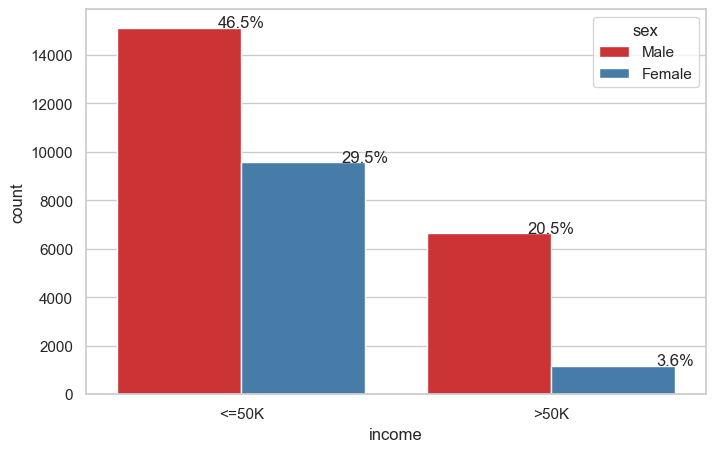

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="income", hue="sex", data=df,palette='Set1')
#plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Male's seems to earn more than female in both the income categories

In [32]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

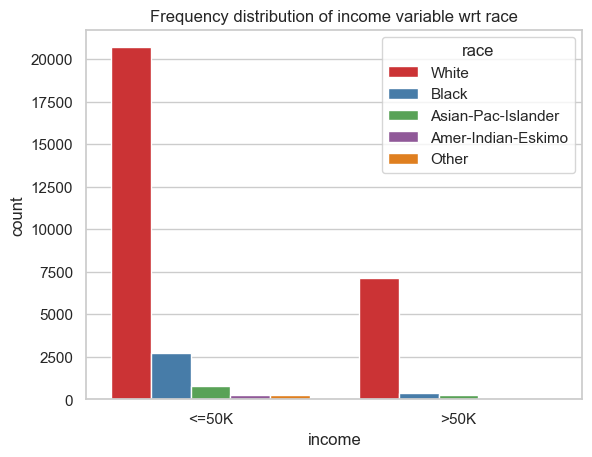

In [33]:
#f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

We can see that whites make more money than non-whites in both the income categories.

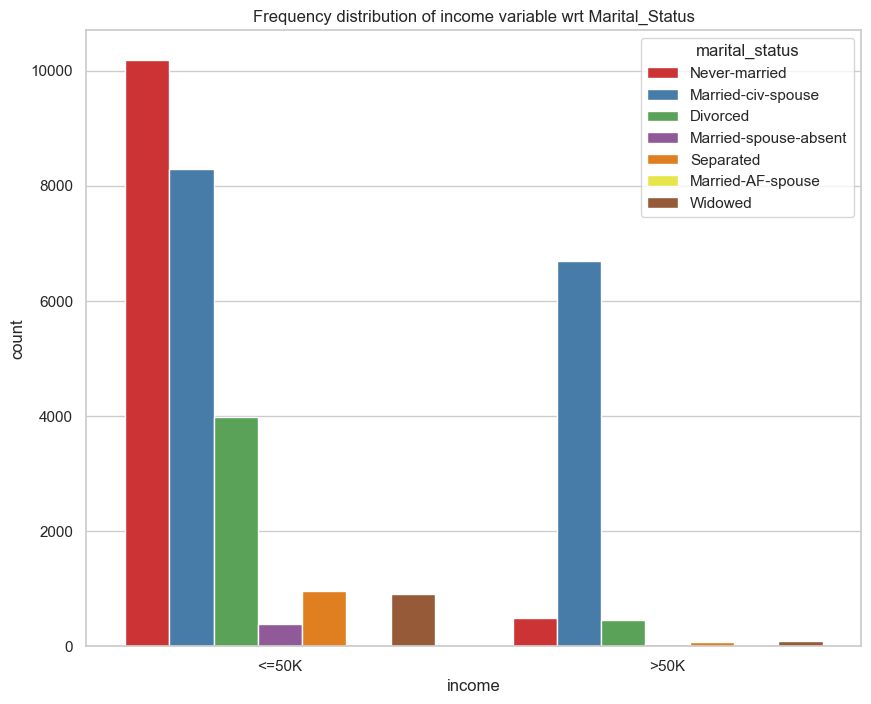

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="marital_status", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt Marital_Status")
plt.show()

#### Interpretation
People who are not married earn less than 50k whereas people who are married earn more. Maybe because married people have a partner who keeps them motivated 

In [35]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


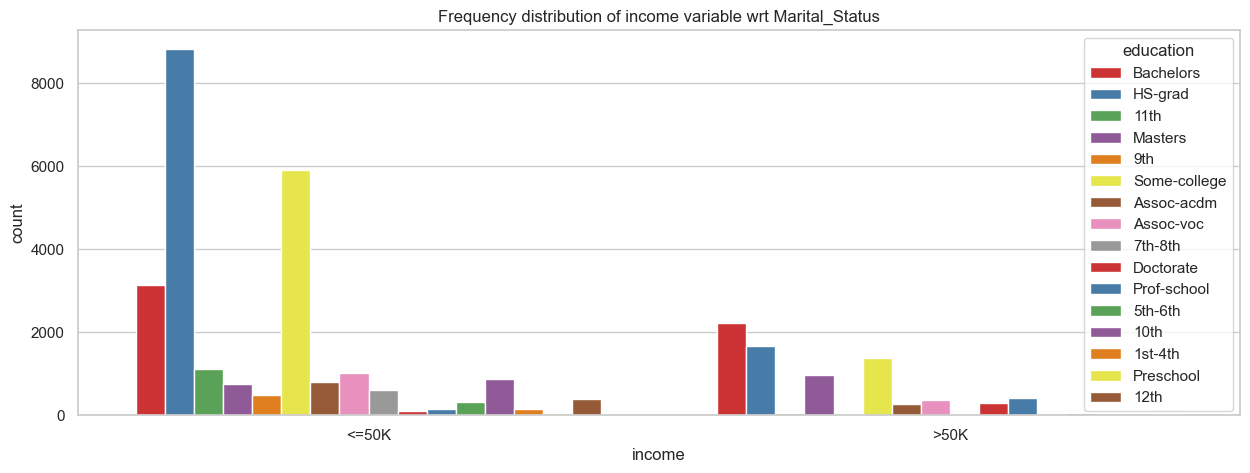

In [36]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="income", hue="education", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt Marital_Status")
plt.show()

We see people who have done masters are earning less than students who have just cleared their high school which is not normal. Let's try to observe more on these people

In [37]:
temp_2 = df.loc[(df['income']=='>50K') & (df['education'] == 'HS-grad')]

<AxesSubplot:xlabel='marital_status', ylabel='count'>

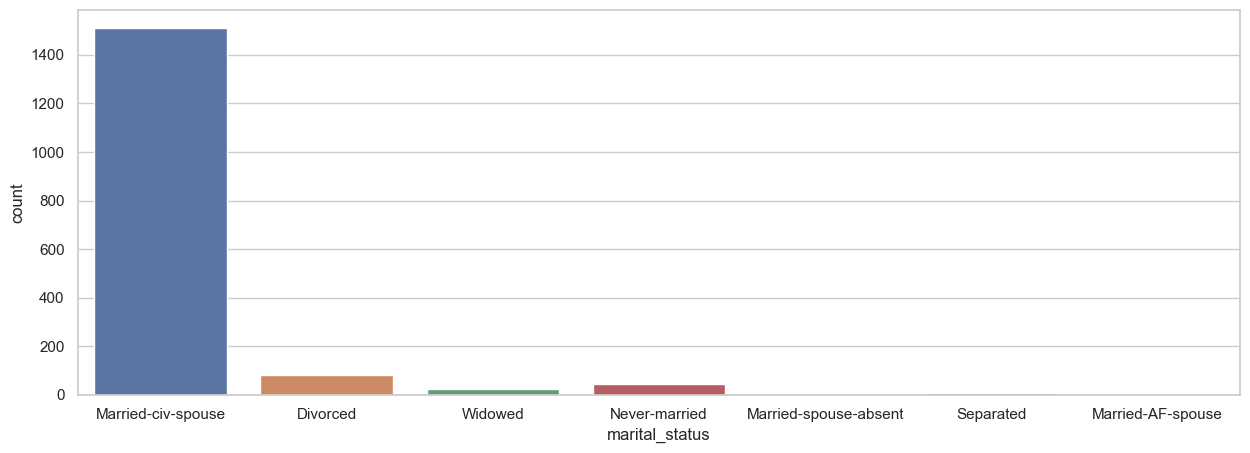

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='marital_status',data=temp_2)

In [39]:
temp_2.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [40]:
df.loc[(df['income']=='>50K') & (df['education'] == 'Masters')]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,adult,1
19,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,adult,1
100,76,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,old,1
135,38,Federal-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Iran,>50K,adult,1
164,45,Self-emp-not-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,33,Private,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,50,United-States,>50K,adult,1
32480,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,adult,1
32504,50,Private,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K,adult,1
32513,46,Private,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K,adult,1


### Numerical Columns

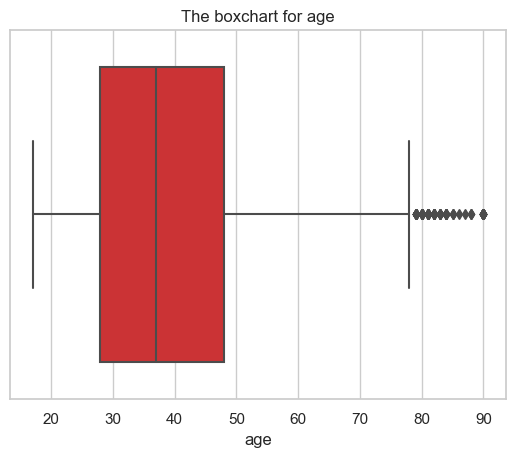

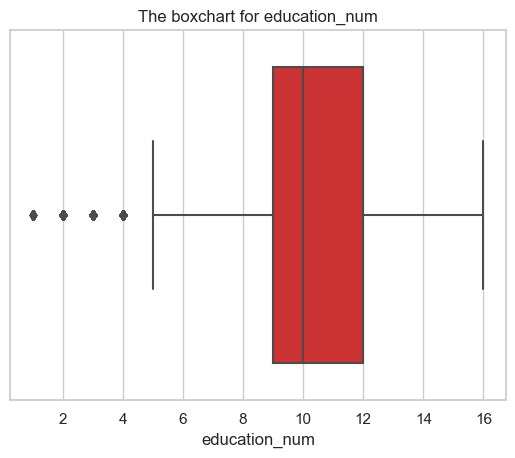

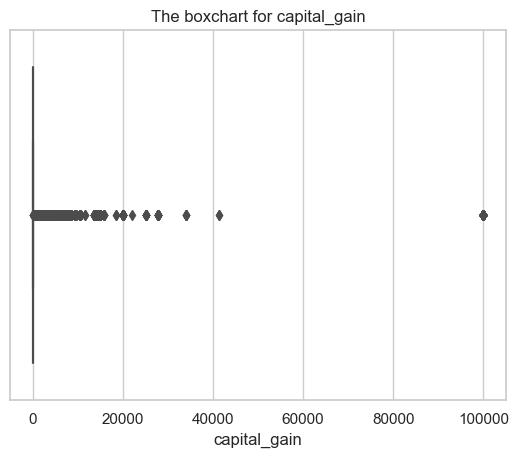

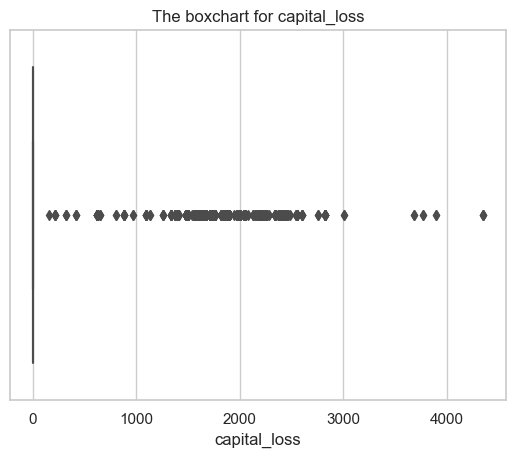

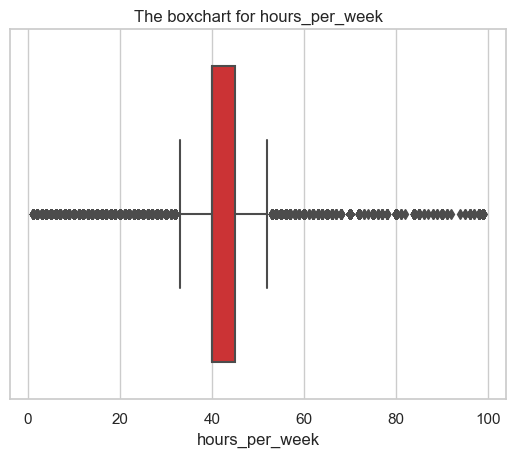

In [41]:
#Let's check for outliers in the numerical columns
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()


We see there are few outliers in capital gain and capital loss, let's look at these plots closely

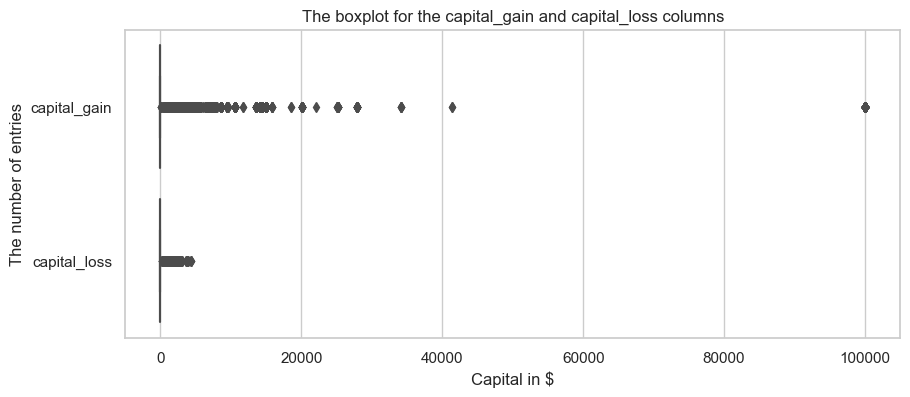

In [42]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=df[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

#### Dropping these outliers as it can lead to the result distortion

In [43]:
abc = df.loc[df['capital_gain']>90000,'capital_gain'].index
df.drop(index=abc,inplace=True)

In [44]:
temp_3 = df.loc[df['capital_loss']>4000,'capital_loss'].index
df.drop(index=temp_3,inplace=True)

In [45]:
numerical

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_18945/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


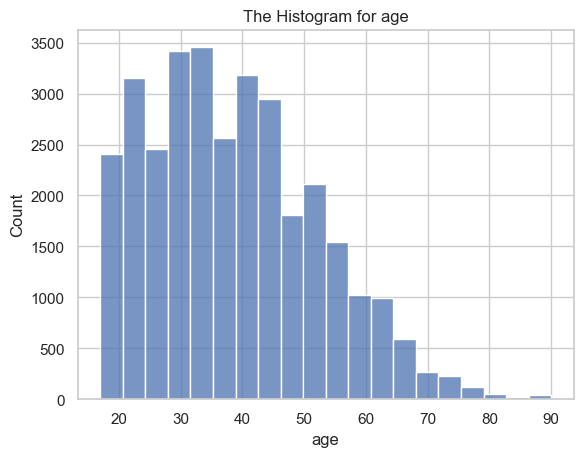

/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_18945/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


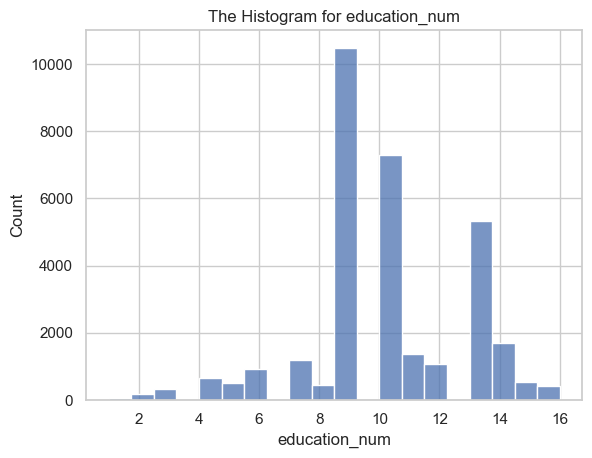

/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_18945/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


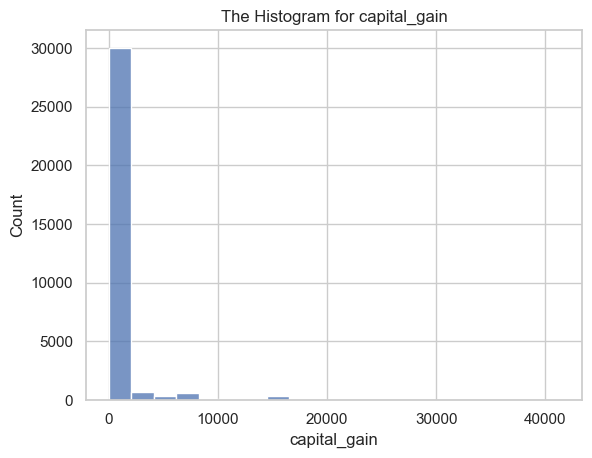

/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_18945/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


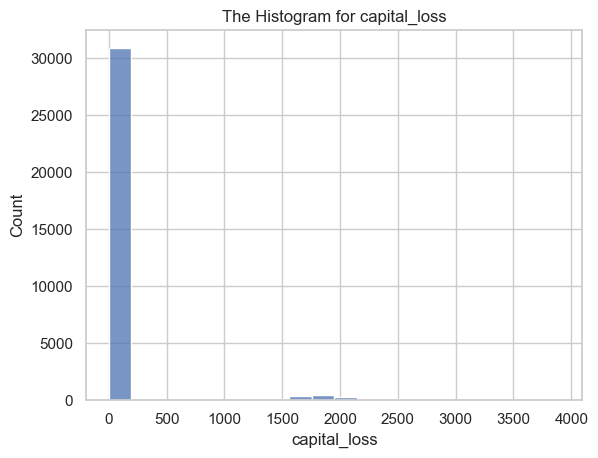

/var/folders/01/y789mnz55p161vf4sjd5zj5h0000gn/T/ipykernel_18945/3422311057.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df[i], palette='Set1',bins=20)


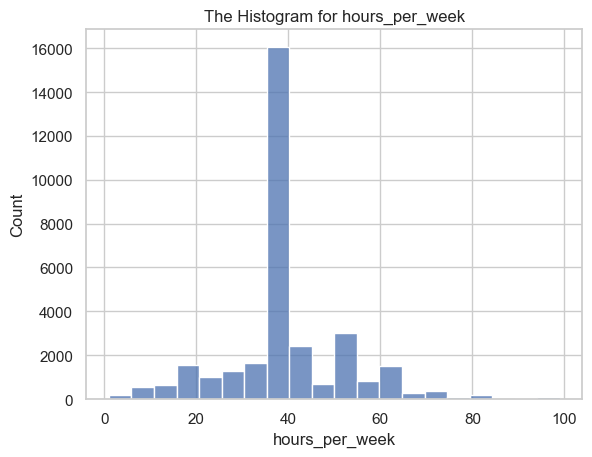

In [46]:

for i in numerical:
    sns.histplot(x=df[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()


#### Interpretation
    Most of the people are between 20-50 age range. The graph is rightly skewed so we need to normalize it by scaling
    The majority af hours per week no more than 50 h/w, and the most value is about 40 (8 hours per day).

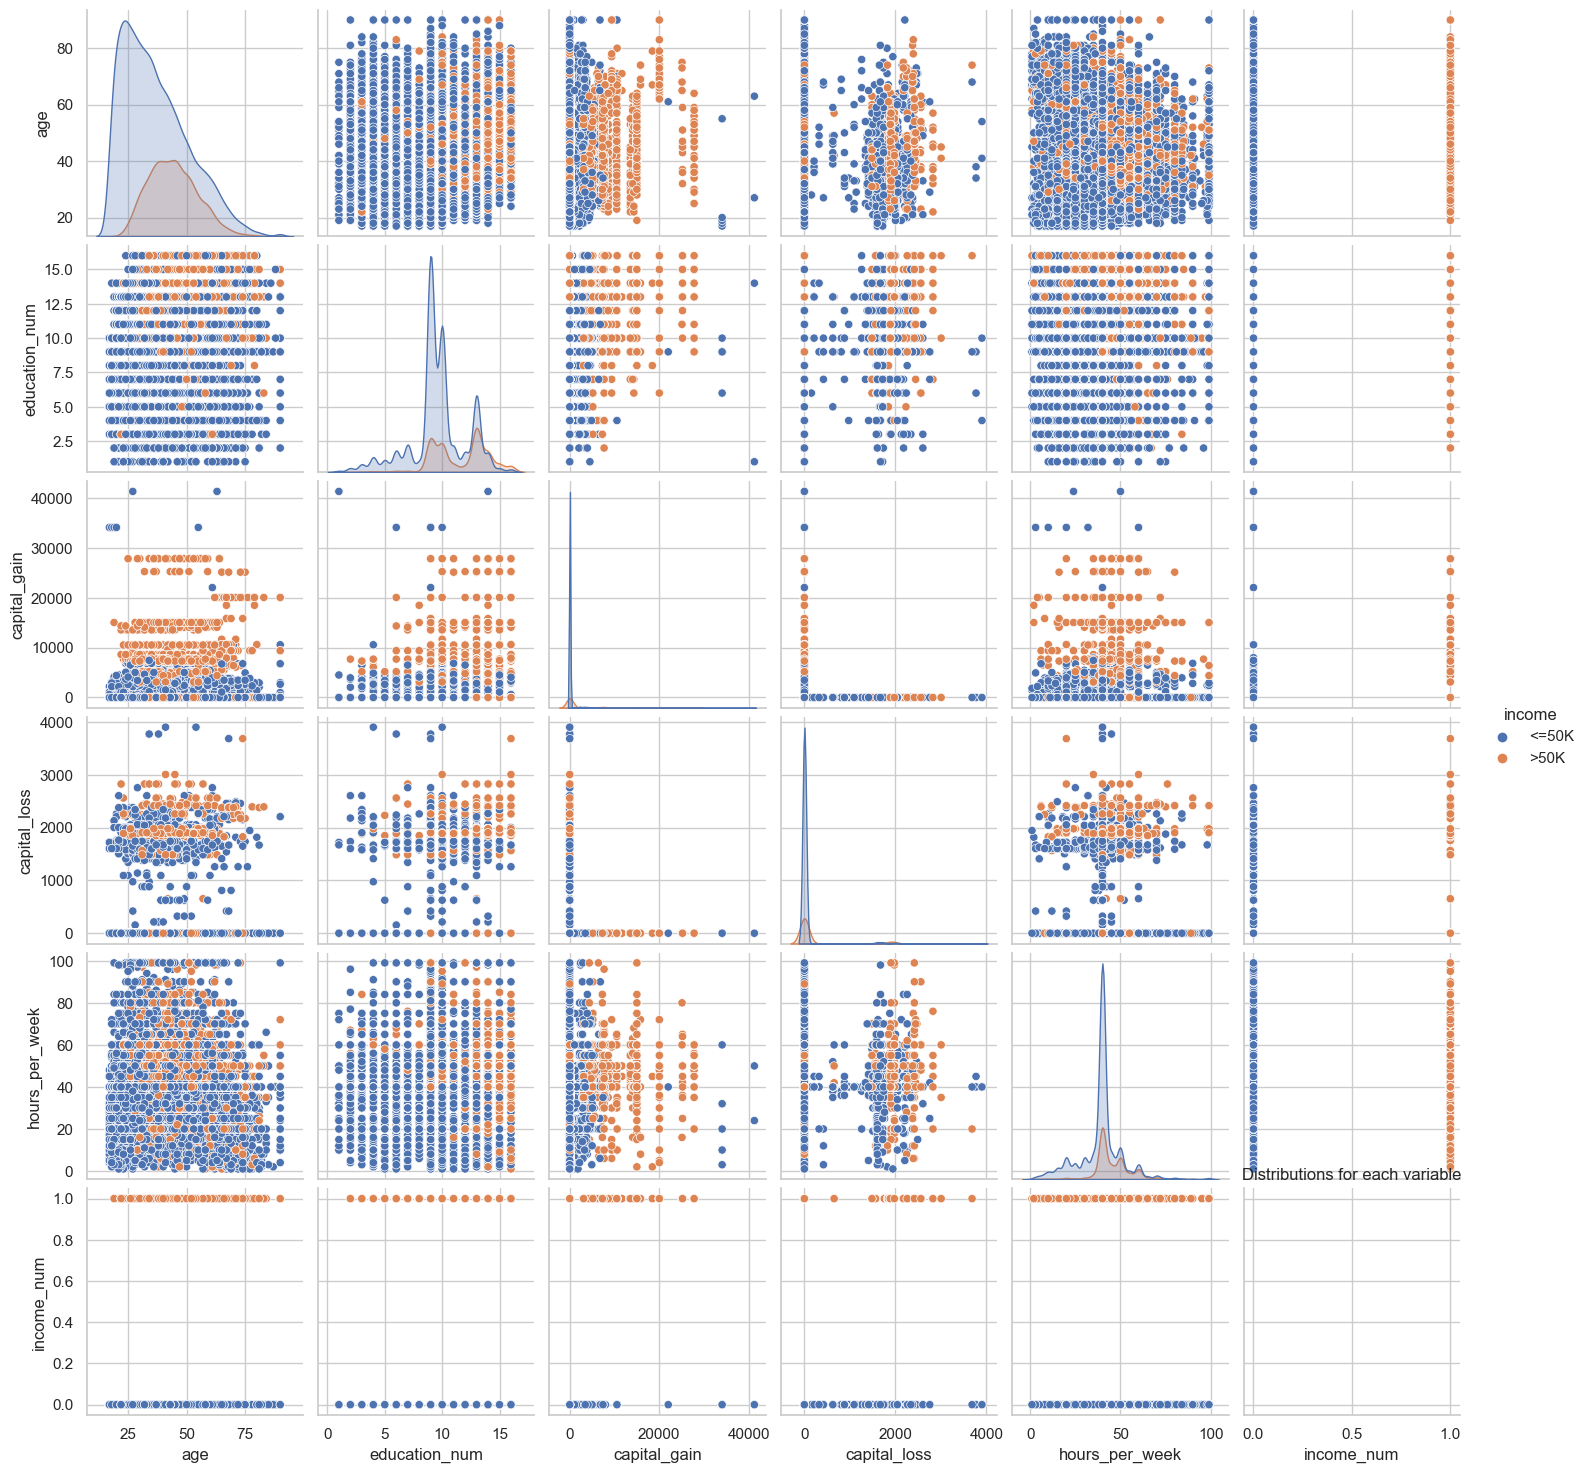

In [47]:
sns.pairplot(data=df, hue="income")
plt.title('Distributions for each variable')
plt.show()

### Categorical Columns

In [49]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

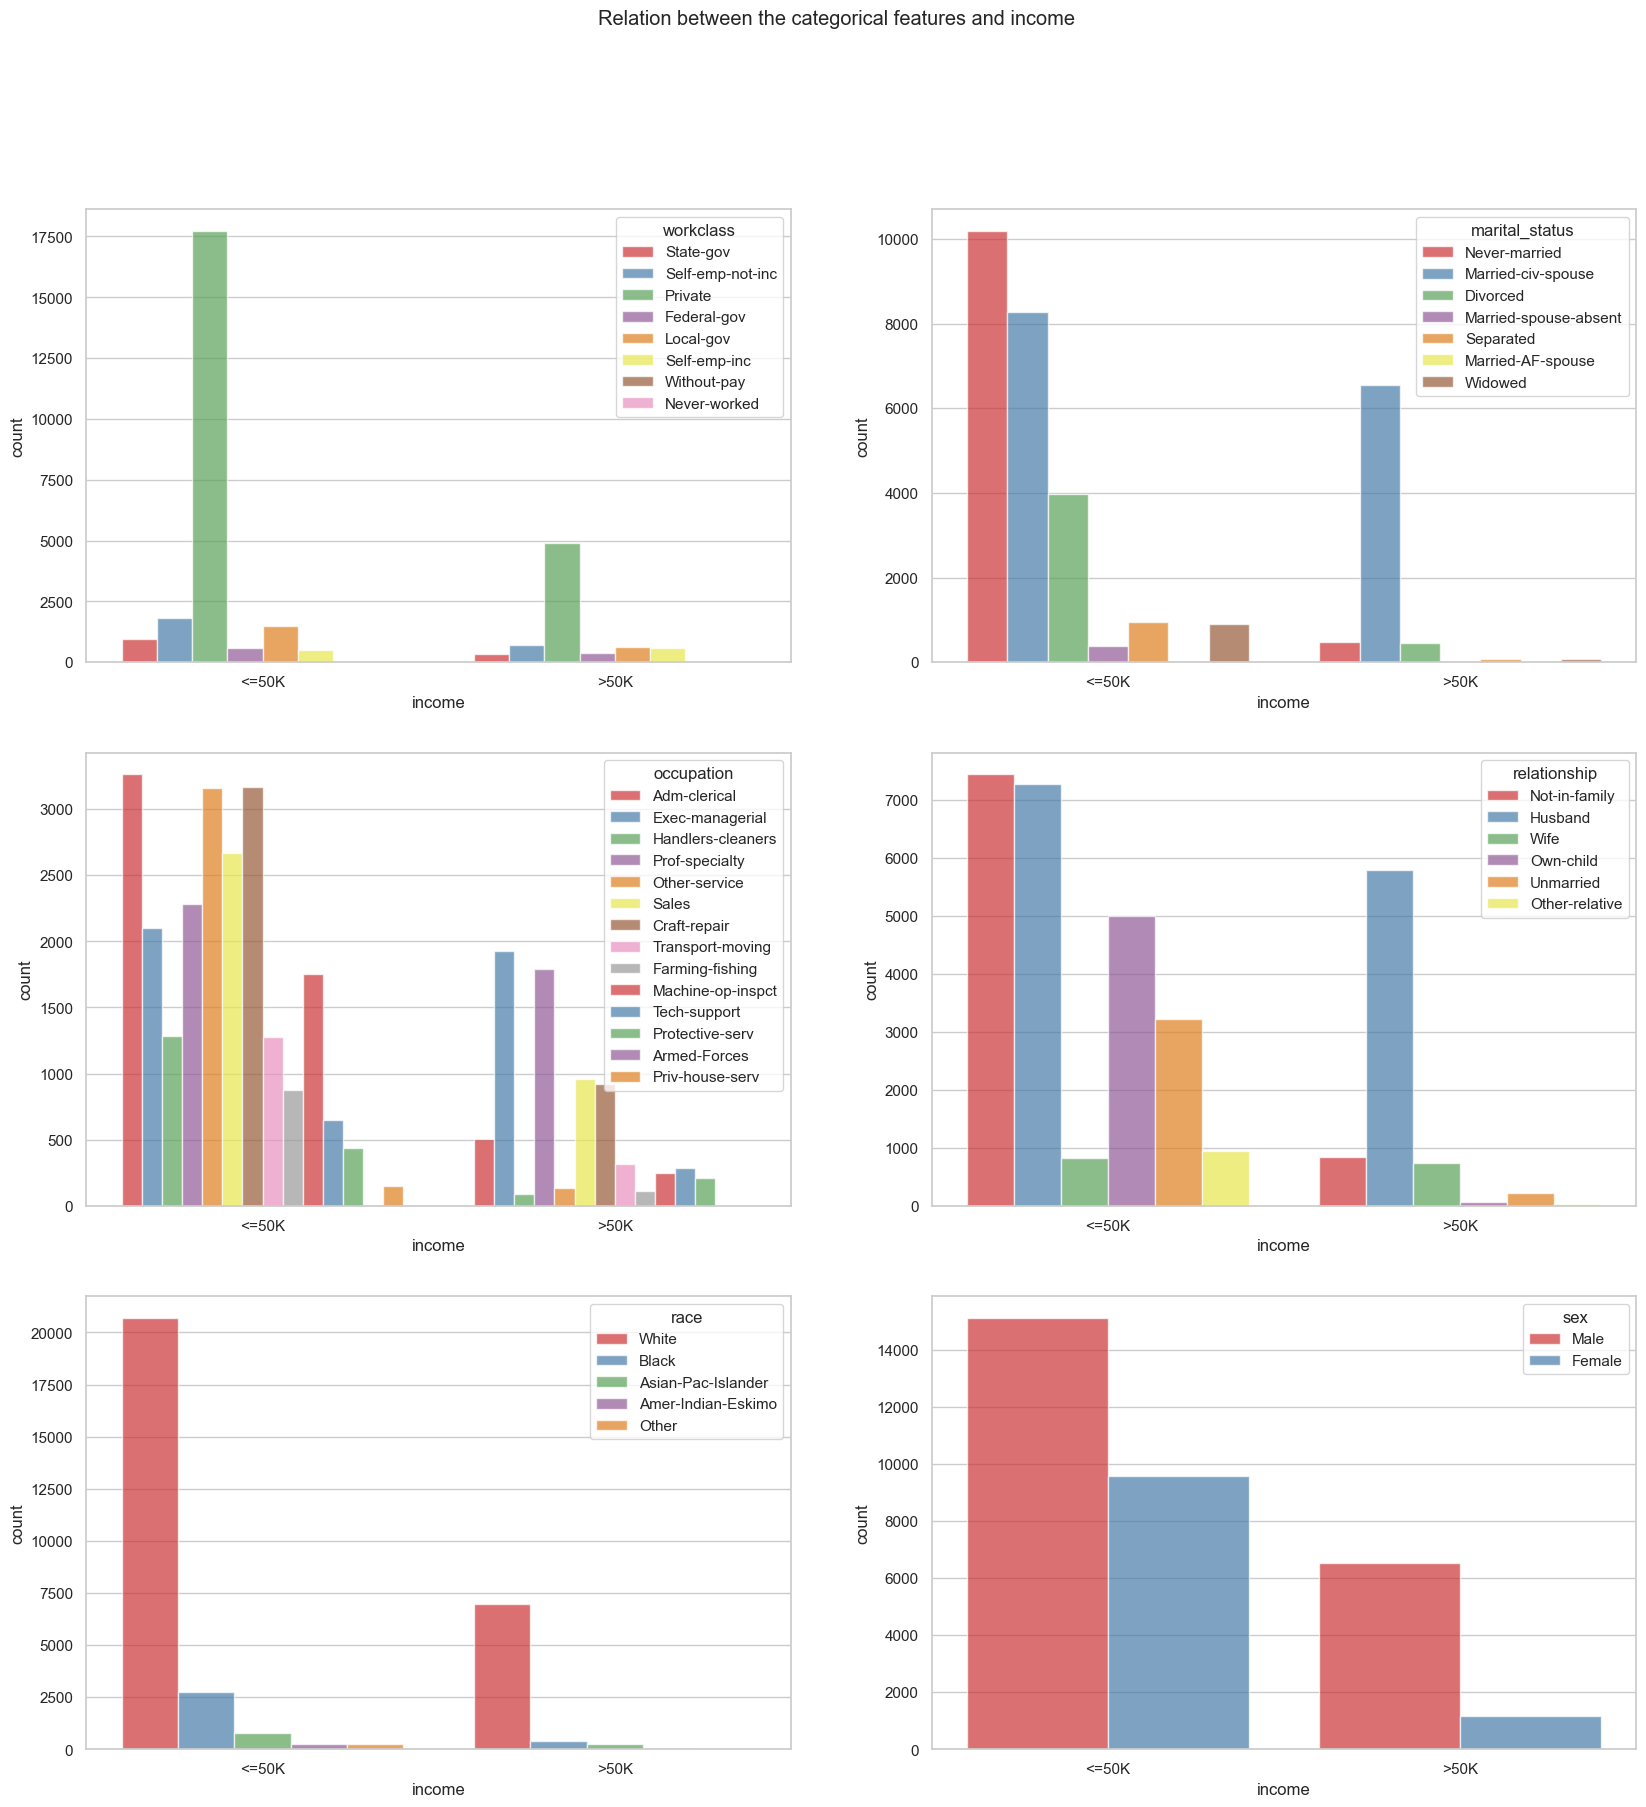

In [48]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and income')

categorical2 = ['workclass', 'marital_status','occupation','relationship','race','sex',]
for ax, i in enumerate(categorical2):
    sns.countplot(x='income', alpha=0.7, hue=i, data=df, ax=axs[ax],palette='Set1')

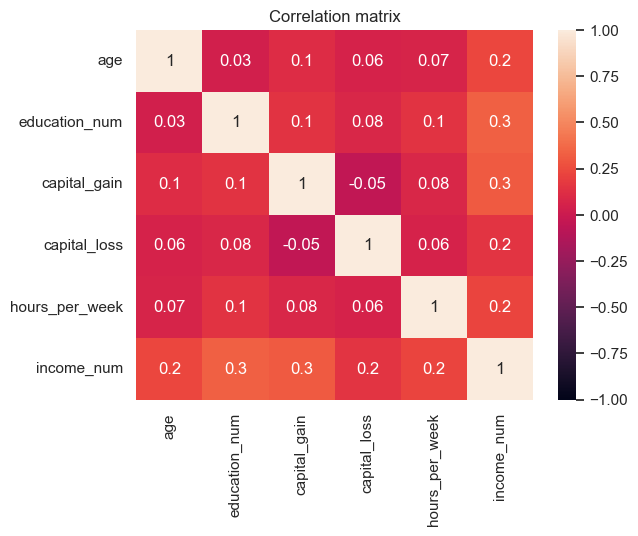

In [50]:
corr = df.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

In [51]:
X = df.drop(columns='income')
y = df['income']

# Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [54]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [55]:
label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for i in label_list:
    label_encoder(i)

In [56]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


# Normalizing the variables 

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [60]:
scaler.fit(df.drop(['income','age_types','income_num'],axis=1))

MinMaxScaler()

In [61]:
scaled_features = scaler.transform(df.drop(['income','age_types','income_num'],axis=1))

In [62]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [63]:
columns=['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']

In [64]:
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.052626,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


# Handling Imbalanced dataset

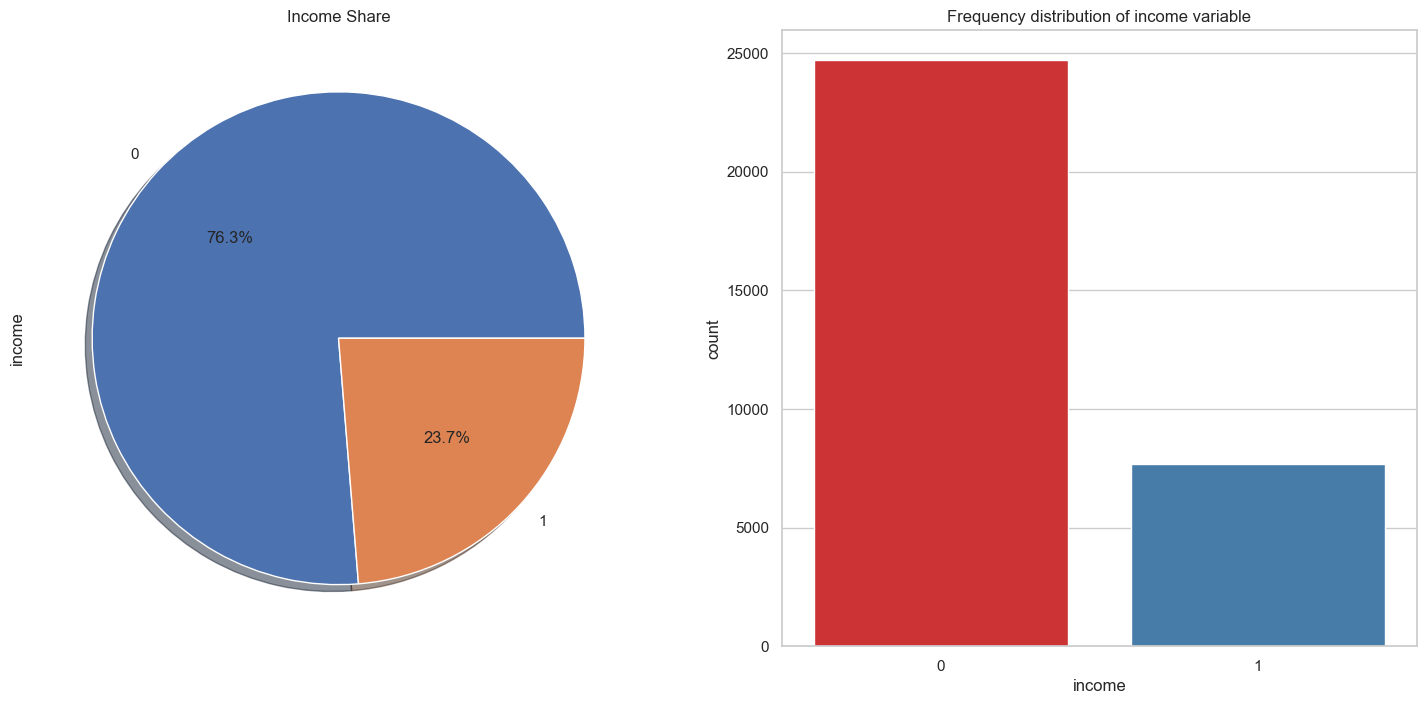

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

### Using over sampling method to handle imbalanced dataset

In [66]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [69]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [70]:
X = df_scaled
y= df.income

In [71]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [72]:
X_res.shape,y_res.shape

((48186, 13), (48186,))

In [73]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 24717, 1: 7682})
Resampled dataset shape Counter({0: 24093, 1: 24093})


# Train_test_split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)

In [76]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38548, 13)
X_test shape: (9638, 13)
y_train shape: (38548,)
y_test shape: (9638,)


In [78]:
X_train.to_csv("../X_train_svm.csv")
X_test.to_csv("../X_test_svm.csv")
y_train.to_csv("../y_train_svm.csv")
y_test.to_csv("../y_test_svm.csv")


In [77]:
# To store results of models
result_dict_train = {}
result_dict_test = {}